# 13.9: Анализ оттока клиентов банка

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pyplt=plotly.offline.plot

In [44]:
churn=pd.read_csv('data/churn.csv')

In [45]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
churn.drop('RowNumber', axis=1) #удаляем столбец RowNumbers, для анализа он не нужен

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

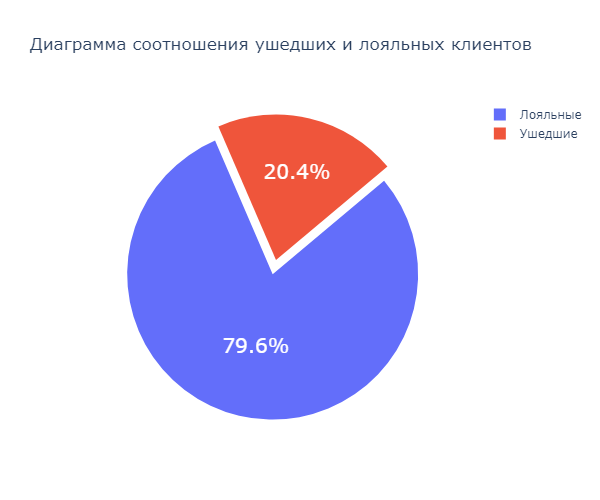

In [47]:
values=[churn[churn['Exited']==0]['Exited'].count(), churn[churn['Exited']==1]['Exited'].count()]
labels=['Лояльные', 'Ушедшие']
trace=[go.Pie(
    labels=labels,
    values=values,
    rotation=50,
    showlegend=True,
    pull=[0.1,0,0,0,0],
    hoverinfo='label+percent',
    textinfo='percent',
    textfont=dict(size=20,color='white'))]
layout=go.Layout(
    title='Диаграмма соотношения ушедших и лояльных клиентов',
    width=600,
    height=500
)
fig=go.Figure(
    data=trace,
    layout=layout
    )
fig.show('png')


Как видно из диаграммы процент ушедших клиентов составляет 20.4%, что говорит о достаточной лояльности клиентов банка.
Большая часть клиентов остается на обслуживании у банка, что является хорошим показателем клиентоориентированости.

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

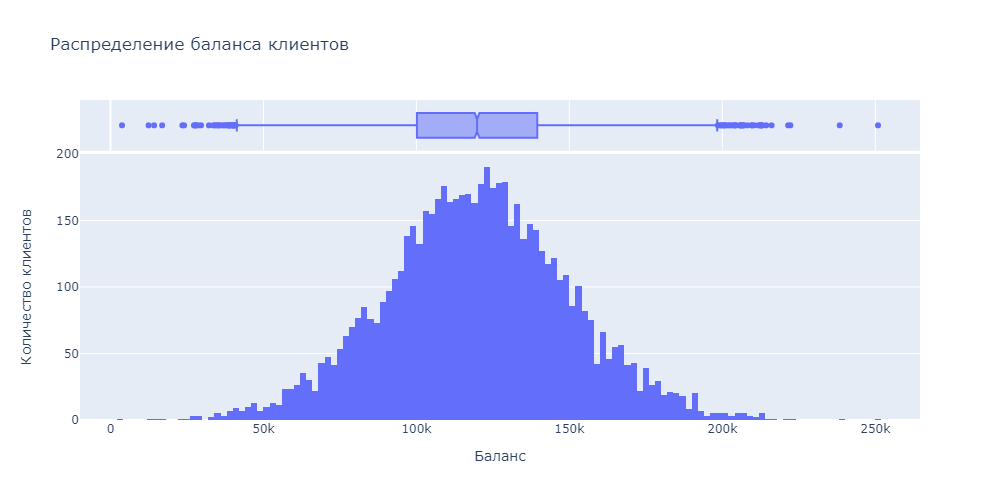

In [48]:
fig_data=churn[churn['Balance']>2500]

fig = px.histogram(
    data_frame=fig_data,
    x='Balance',
    title='Распределение баланса клиентов',
    marginal='box', # Построим рядом коробчатую диаграмму для наглядности выбросов
    labels={'Balance': 'Баланс'},
    width=1000
)
fig.update_layout(xaxis_title="Баланс",
                  yaxis_title="Количество клиентов",
                  )
fig.show('png')

Медианная распределения суммы на счету клиентов составляет $ 119k. Клиенты банка хранят на своих счетах суммы от 100 до 150 тысяч долларов,
что может говорить о том, что основная часть потребителей пользуются услугами банка для накопления денежных средств.

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

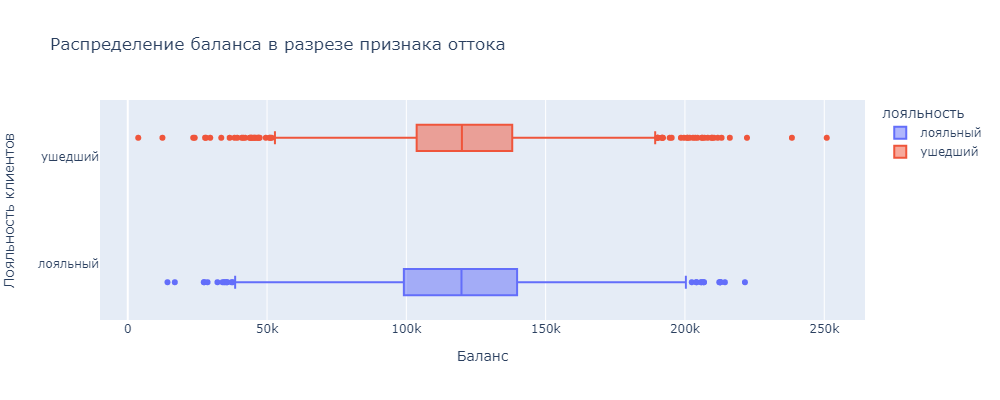

In [49]:

fig_data=churn[churn['Balance']>2500]

fig = px.box(
    data_frame=fig_data,
    x='Balance',
    y=fig_data['Exited'].map({0:'лояльный', 1:'ушедший'}),
    title='Распределение баланса в разрезе признака оттока',
    color=fig_data['Exited'].map({0:'лояльный', 1:'ушедший'}),
    labels={'Balance': 'Баланс', 'color': 'лояльность'},
    width=1000,
    height=400
)
fig.update_layout(xaxis_title="Баланс",
                  yaxis_title="Лояльность клиентов",)


fig.show('png')


Выводы:

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

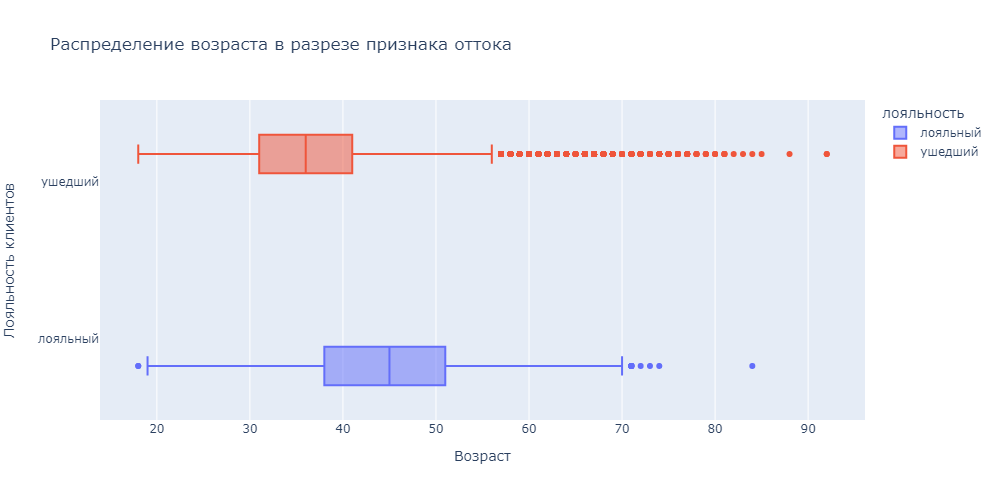

In [50]:
fig = px.box(
    data_frame=churn,
    x='Age',
    y=churn['Exited'].map({0:'ушедший', 1:'лояльный'}),
    title='Распределение возраста в разрезе признака оттока',
    color=churn['Exited'].map({0:'ушедший', 1:'лояльный'}),
    labels={'Age': 'Возраст','color': 'лояльность'},
    width=1000
)
fig.update_layout(xaxis_title="Возраст",
                  yaxis_title="Лояльность клиентов",
                  )
fig.show('png')
fig.write_html('temp/13.9.4.html')

Выводы:

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      862 non-null    int64  
 1   Exited           862 non-null    int64  
 2   EstimatedSalary  862 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 20.3 KB


None

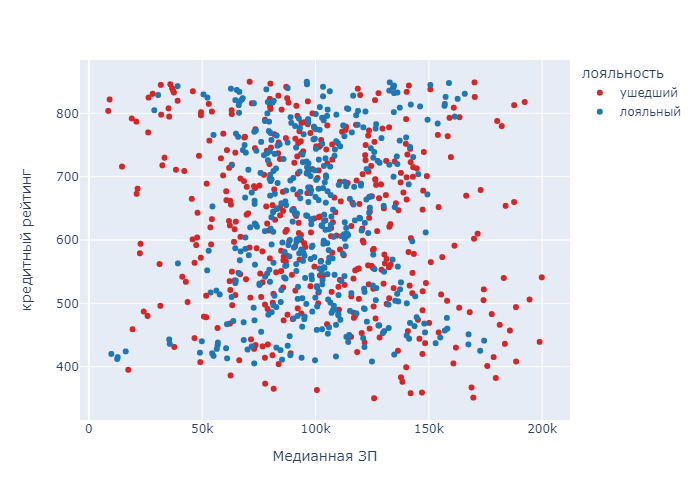

In [51]:
#CreditScore EstimatedSalary

fig_data=churn.groupby(
    ['CreditScore', 'Exited'],
    as_index=False
)[['EstimatedSalary']].median()

display(fig_data.info())

fig=px.scatter(
    fig_data,
    y='CreditScore',
    x='EstimatedSalary',
    color=fig_data['Exited'].map({0:'лояльный', 1:'ушедший'}),
    labels={'color': 'лояльность', 'CreditScore':'кредитный рейтинг', 'EstimatedSalary':'Медианная ЗП'},
    color_discrete_sequence=churn['Exited'].map({0:'#1f77b4', 1:'#d62728'})
)

fig.show('png')
fig.write_html('temp/13.9.5.html')

Выводы:

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [52]:
#'#1f77b4',  // muted blue
#   '#ff7f0e',  // safety orange
#   '#2ca02c',  // cooked asparagus green
#   '#d62728',  // brick red
#   '#9467bd',  // muted purple
#   '#8c564b',  // chestnut brown
#   '#e377c2',  // raspberry yogurt pink
#   '#7f7f7f',  // middle gray
#   '#bcbd22',  // curry yellow-green
#   '#17becf'   // blue-teal



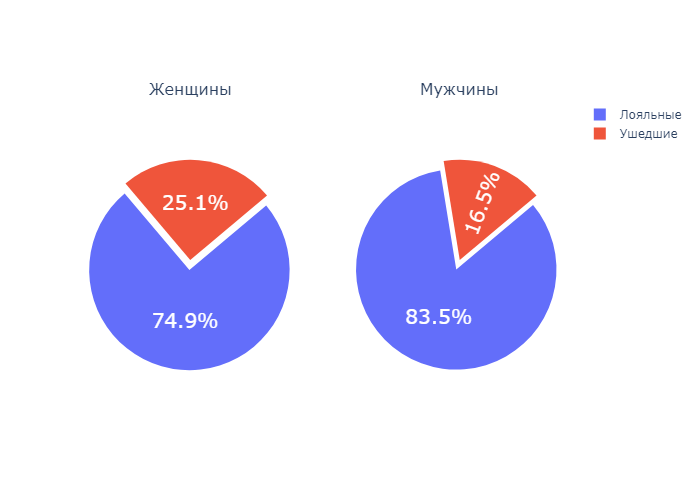

In [65]:
## 

valuesf=[(1-churn[churn['Gender']=='Female']['Exited'].mean()), churn[churn['Gender']=='Female']['Exited'].mean()]
valuesm=[(1-churn[churn['Gender']=='Male']['Exited'].mean()), churn[churn['Gender']=='Male']['Exited'].mean()]

labels=['Лояльные', 'Ушедшие']

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Женщины","Мужчины"))

fig.add_trace(go.Pie(
    labels=labels,
    values=valuesf,
    rotation=50,
    showlegend=True,
    pull=[0.1,0,0,0,0],
    hoverinfo='label+percent+name',
    textinfo='percent',
    textfont=dict(size=20,color='white'),
    domain=dict(x=[0, 0.5]),
    name="Женщины"),
              row=1, col=1)


fig.add_trace(go.Pie(
    labels=labels,
    values=valuesm,
    rotation=50,
    showlegend=True,
    pull=[0.1,0,0,0,0],
    hoverinfo='label+percent+name',
    textinfo='percent',
    textfont=dict(size=20,color='white'),
    domain=dict(x=[0.5, 1.0]),
    name="Мужчины"),
              row=1, col=2)


fig.show('png')

fig.write_html('temp/13.9.6.html')

Выводы:

### 9.7 Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.